In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')


In [2]:
sentiment_df=pd.read_csv('/content/fear_greed_index.csv')
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [3]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [4]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
sentiment_df.set_index('date', inplace=True)

In [5]:
sentiment_df.columns

Index(['timestamp', 'value', 'classification'], dtype='object')

In [6]:
sentiment_df

,timestamp,value,classification
date,,,
2018-02-01,1517463000,30,Fear
2018-02-02,1517549400,15,Extreme Fear
2018-02-03,1517635800,40,Fear
2018-02-04,1517722200,24,Extreme Fear
2018-02-05,1517808600,11,Extreme Fear
...,...,...,...
2025-04-28,1745818200,54,Neutral
2025-04-29,1745904600,60,Greed
2025-04-30,1745991000,56,Greed


In [7]:
bitcoin_df=pd.read_csv('/content/historical_data.csv')
bitcoin_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [8]:
bitcoin_df.drop("Account",inplace=True,axis=1)
bitcoin_df.drop(['Transaction Hash','Trade ID','Order ID'],inplace=True,axis=1)

In [9]:
bitcoin_df.columns

Index(['Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Crossed',
       'Fee', 'Timestamp'],
      dtype='object')

In [10]:
bitcoin_df['Timestamp']=pd.to_datetime(bitcoin_df['Timestamp'],unit='ms')
bitcoin_df.set_index('Timestamp',inplace=True)

In [11]:
bitcoin_df.drop('Timestamp IST',axis=1,inplace=True)

In [12]:
bitcoin_df

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee
Timestamp,,,,,,,,,,
2024-10-27 03:33:20,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0000,True,0.345404
2024-10-27 03:33:20,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0000,True,0.005600
2024-10-27 03:33:20,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0000,True,0.050431
2024-10-27 03:33:20,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0000,True,0.050043
2024-10-27 03:33:20,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0000,True,0.003055
...,...,...,...,...,...,...,...,...,...,...
2025-06-15 15:06:40,FARTCOIN,1.1010,382.20,420.80,SELL,7546.600000,Close Long,-20.2566,False,0.042080
2025-06-15 15:06:40,FARTCOIN,1.1010,2124.10,2338.63,SELL,7164.400000,Close Long,-112.5773,False,0.233863
2025-06-15 15:06:40,FARTCOIN,1.1010,423.40,466.16,SELL,5040.300000,Close Long,-22.4402,False,0.046616


# MERGED DATAFRAME

In [13]:
# Add 'date_only' column if not already present
bitcoin_df["date_only"] = bitcoin_df.index.date
sentiment_df["date_only"] = sentiment_df.index.date

# Merge classification and value based on date_only
merged_df = bitcoin_df.merge(
    sentiment_df[["date_only", "classification", "value"]],
    on="date_only",
    how="left"
)


In [14]:
merged_df

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Direction,Closed PnL,Crossed,Fee,date_only,classification,value
0,@107,7.9769,986.87,7872.16,BUY,0.000000,Buy,0.0000,True,0.345404,2024-10-27,Greed,74.0
1,@107,7.9800,16.00,127.68,BUY,986.524596,Buy,0.0000,True,0.005600,2024-10-27,Greed,74.0
2,@107,7.9855,144.09,1150.63,BUY,1002.518996,Buy,0.0000,True,0.050431,2024-10-27,Greed,74.0
3,@107,7.9874,142.98,1142.04,BUY,1146.558564,Buy,0.0000,True,0.050043,2024-10-27,Greed,74.0
4,@107,7.9894,8.73,69.75,BUY,1289.488521,Buy,0.0000,True,0.003055,2024-10-27,Greed,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,FARTCOIN,1.1010,382.20,420.80,SELL,7546.600000,Close Long,-20.2566,False,0.042080,2025-06-15,NaN,NaN
211220,FARTCOIN,1.1010,2124.10,2338.63,SELL,7164.400000,Close Long,-112.5773,False,0.233863,2025-06-15,NaN,NaN
211221,FARTCOIN,1.1010,423.40,466.16,SELL,5040.300000,Close Long,-22.4402,False,0.046616,2025-06-15,NaN,NaN
211222,FARTCOIN,1.1010,3599.80,3963.38,SELL,4616.900000,Close Long,-190.7894,False,0.396337,2025-06-15,NaN,NaN


In [15]:
merged_df.dropna(inplace=True)

In [16]:
merged_df.set_index('date_only',inplace=True)

In [17]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184263 entries, 2024-10-27 to 2025-02-19
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Coin             184263 non-null  object 
 1   Execution Price  184263 non-null  float64
 2   Size Tokens      184263 non-null  float64
 3   Size USD         184263 non-null  float64
 4   Side             184263 non-null  object 
 5   Start Position   184263 non-null  float64
 6   Direction        184263 non-null  object 
 7   Closed PnL       184263 non-null  float64
 8   Crossed          184263 non-null  bool   
 9   Fee              184263 non-null  float64
 10  classification   184263 non-null  object 
 11  value            184263 non-null  float64
dtypes: bool(1), float64(7), object(4)
memory usage: 17.0+ MB


In [18]:
merged_df.to_csv('merged_bitcoin_trades_sentiment.csv')
print("Merged dataset saved as 'merged_bitcoin_trades_sentiment.csv'")

Merged dataset saved as 'merged_bitcoin_trades_sentiment.csv'


In [19]:
merged_df.shape

(184263, 12)

In [20]:
merged_df['value'].value_counts()

,count
value,
44.0,133871
74.0,35241
50.0,7141
84.0,6962
69.0,1045
59.0,3


In [21]:
merged_df['Side'].value_counts()

,count
Side,
SELL,95885
BUY,88378


In [22]:
merged_df['classification'].value_counts()

,count
classification,
Fear,133871
Greed,36289
Neutral,7141
Extreme Greed,6962


In [23]:
merged_df['Direction'].value_counts()

,count
Direction,
Open Long,45564
Close Long,44935
Open Short,32861
Close Short,28091
Sell,17890
Buy,14657
Spot Dust Conversion,137
Short > Long,65
Long > Short,54


# EDA ON DATA

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Assuming your dataframe is named 'merged_df'
# merged_df = your_dataframe_here

def comprehensive_bitcoin_eda(df):
    """
    Comprehensive EDA for Bitcoin trading data with Greed/Fear index
    """

    print("="*80)
    print("COMPREHENSIVE BITCOIN TRADING EDA WITH GREED/FEAR INDEX ANALYSIS")
    print("="*80)

    # ==================== BASIC DATA OVERVIEW ====================
    print("\n1. BASIC DATA OVERVIEW")
    print("-" * 50)
    print(f"Dataset Shape: {df.shape}")
    print(f"Date Range: {df.index.min()} to {df.index.max()}")
    print(f"Total Trading Volume (USD): ${df['Size USD'].sum():,.2f}")
    print(f"Total Fees Paid: ${df['Fee'].sum():,.2f}")
    print(f"Net PnL: ${df['Closed PnL'].sum():,.2f}")

    # ==================== Q1: PnL ANALYSIS BY CLASSIFICATION ====================
    print("\n" + "="*80)
    print("Q1: PnL BEHAVIOR BY GREED/FEAR CLASSIFICATION")
    print("="*80)

    # PnL statistics by classification
    pnl_by_classification = df.groupby('classification').agg({
        'Closed PnL': ['sum', 'mean', 'std', 'count'],
        'Size USD': 'sum',
        'Fee': 'sum'
    }).round(4)

    pnl_by_classification.columns = ['Total_PnL', 'Avg_PnL', 'PnL_Std', 'Trade_Count', 'Total_Volume', 'Total_Fees']
    pnl_by_classification['Win_Rate'] = df.groupby('classification')['Closed PnL'].apply(lambda x: (x > 0).mean() * 100).round(2)
    pnl_by_classification['Profit_Factor'] = df.groupby('classification')['Closed PnL'].apply(
        lambda x: abs(x[x > 0].sum()) / abs(x[x < 0].sum()) if x[x < 0].sum() != 0 else float('inf')
    ).round(4)
    pnl_by_classification['ROI_Percentage'] = (pnl_by_classification['Total_PnL'] / pnl_by_classification['Total_Volume'] * 100).round(4)

    print("\nPnL Analysis by Classification:")
    print(pnl_by_classification)

    # Visualization: PnL by Classification
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('PnL Analysis by Greed/Fear Classification', fontsize=16, fontweight='bold')

    # Total PnL by classification
    pnl_by_classification['Total_PnL'].plot(kind='bar', ax=axes[0,0], color='skyblue', edgecolor='black')
    axes[0,0].set_title('Total PnL by Classification')
    axes[0,0].set_ylabel('Total PnL ($)')
    axes[0,0].tick_params(axis='x', rotation=45)

    # Win Rate by classification
    pnl_by_classification['Win_Rate'].plot(kind='bar', ax=axes[0,1], color='lightgreen', edgecolor='black')
    axes[0,1].set_title('Win Rate by Classification')
    axes[0,1].set_ylabel('Win Rate (%)')
    axes[0,1].tick_params(axis='x', rotation=45)

    # Average PnL by classification
    pnl_by_classification['Avg_PnL'].plot(kind='bar', ax=axes[1,0], color='orange', edgecolor='black')
    axes[1,0].set_title('Average PnL per Trade by Classification')
    axes[1,0].set_ylabel('Average PnL ($)')
    axes[1,0].tick_params(axis='x', rotation=45)

    # ROI Percentage by classification
    pnl_by_classification['ROI_Percentage'].plot(kind='bar', ax=axes[1,1], color='pink', edgecolor='black')
    axes[1,1].set_title('ROI Percentage by Classification')
    axes[1,1].set_ylabel('ROI (%)')
    axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Key Insights for Q1
    best_classification = pnl_by_classification.loc[pnl_by_classification['Total_PnL'].idxmax()]
    best_roi_classification = pnl_by_classification.loc[pnl_by_classification['ROI_Percentage'].idxmax()]

    print(f"\n🎯 KEY INSIGHTS - Q1:")
    print(f"• Best Total PnL: {pnl_by_classification['Total_PnL'].idxmax()} (${best_classification['Total_PnL']:,.2f})")
    print(f"• Best ROI: {pnl_by_classification['ROI_Percentage'].idxmax()} ({best_roi_classification['ROI_Percentage']:.2f}%)")
    print(f"• Highest Win Rate: {pnl_by_classification['Win_Rate'].idxmax()} ({pnl_by_classification['Win_Rate'].max():.2f}%)")

    # ==================== Q2: BUY/SELL ANALYSIS ====================
    print("\n" + "="*80)
    print("Q2: BUY/SELL BEHAVIOR ANALYSIS")
    print("="*80)

    # Separate buy and sell transactions
    buy_trades = df[df['Side'] == 'BUY'].copy()
    sell_trades = df[df['Side'] == 'SELL'].copy()

    print(f"\nBuy Trades: {len(buy_trades):,} transactions")
    print(f"Sell Trades: {len(sell_trades):,} transactions")

    # Buy analysis by classification
    buy_analysis = buy_trades.groupby('classification').agg({
        'Execution Price': ['mean', 'std', 'min', 'max'],
        'Size USD': ['sum', 'mean'],
        'Start Position': 'mean',
        'Size Tokens': 'sum'
    }).round(4)

    print("\nBUY TRADES ANALYSIS:")
    print(buy_analysis)

    # Sell analysis by classification
    sell_analysis = sell_trades.groupby('classification').agg({
        'Execution Price': ['mean', 'std', 'min', 'max'],
        'Size USD': ['sum', 'mean'],
        'Closed PnL': ['sum', 'mean'],
        'Size Tokens': 'sum'
    }).round(4)

    print("\nSELL TRADES ANALYSIS:")
    print(sell_analysis)

    # Visualization: Buy vs Sell patterns
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Buy vs Sell Analysis by Classification', fontsize=16, fontweight='bold')

    # Average execution price for buy vs sell
    buy_avg_price = buy_trades.groupby('classification')['Execution Price'].mean()
    sell_avg_price = sell_trades.groupby('classification')['Execution Price'].mean()

    x = np.arange(len(buy_avg_price))
    width = 0.35

    axes[0,0].bar(x - width/2, buy_avg_price.values, width, label='Buy', color='green', alpha=0.7)
    axes[0,0].bar(x + width/2, sell_avg_price.values, width, label='Sell', color='red', alpha=0.7)
    axes[0,0].set_title('Average Execution Price: Buy vs Sell')
    axes[0,0].set_ylabel('Price ($)')
    axes[0,0].set_xticks(x)
    axes[0,0].set_xticklabels(buy_avg_price.index, rotation=45)
    axes[0,0].legend()

    # Volume by classification and side
    volume_by_side = df.groupby(['classification', 'Side'])['Size USD'].sum().unstack()
    volume_by_side.plot(kind='bar', ax=axes[0,1], stacked=True)
    axes[0,1].set_title('Trading Volume by Classification and Side')
    axes[0,1].set_ylabel('Volume (USD)')
    axes[0,1].tick_params(axis='x', rotation=45)

    # Price spread analysis
    price_spread = sell_avg_price - buy_avg_price
    price_spread.plot(kind='bar', ax=axes[1,0], color='purple', alpha=0.7)
    axes[1,0].set_title('Price Spread (Sell - Buy) by Classification')
    axes[1,0].set_ylabel('Price Spread ($)')
    axes[1,0].tick_params(axis='x', rotation=45)

    # Trade count by classification and side
    trade_count = df.groupby(['classification', 'Side']).size().unstack()
    trade_count.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Trade Count by Classification and Side')
    axes[1,1].set_ylabel('Number of Trades')
    axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    print(f"\n🎯 KEY INSIGHTS - Q2:")
    best_buy_classification = buy_avg_price.idxmin()  # Lower buy price is better
    best_sell_classification = sell_avg_price.idxmax()  # Higher sell price is better
    print(f"• Best classification for BUYING: {best_buy_classification} (Avg: ${buy_avg_price.min():.4f})")
    print(f"• Best classification for SELLING: {best_sell_classification} (Avg: ${sell_avg_price.max():.4f})")
    print(f"• Largest price spread: {price_spread.idxmax()} (${price_spread.max():.4f})")

    # ==================== Q3: CROSSED (ORDER TYPE) ANALYSIS ====================
    print("\n" + "="*80)
    print("Q3: ORDER TYPE (CROSSED) PROFITABILITY ANALYSIS")
    print("="*80)

    # Analysis by order type and classification
    crossed_analysis = df.groupby(['Crossed', 'classification']).agg({
        'Closed PnL': ['sum', 'mean', 'count'],
        'Size USD': 'sum',
        'Fee': 'sum'
    }).round(4)

    crossed_analysis.columns = ['Total_PnL', 'Avg_PnL', 'Trade_Count', 'Volume', 'Total_Fees']

    print("\nOrder Type Analysis (True=Market Order, False=Limit Order):")
    print(crossed_analysis)

    # Win rate by order type and classification
    win_rate_crossed = df.groupby(['Crossed', 'classification'])['Closed PnL'].apply(
        lambda x: (x > 0).mean() * 100
    ).round(2)

    print("\nWin Rate by Order Type and Classification:")
    print(win_rate_crossed.unstack())

    # Visualization: Order type analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Order Type (Market vs Limit) Profitability Analysis', fontsize=16, fontweight='bold')

    # PnL by order type
    pnl_by_crossed = df.groupby('Crossed')['Closed PnL'].sum()
    pnl_by_crossed.plot(kind='bar', ax=axes[0,0], color=['orange', 'blue'])
    axes[0,0].set_title('Total PnL by Order Type')
    axes[0,0].set_ylabel('Total PnL ($)')
    axes[0,0].set_xticklabels(['Limit Order', 'Market Order'], rotation=0)

    # Average PnL by order type and classification
    avg_pnl_heatmap = df.groupby(['Crossed', 'classification'])['Closed PnL'].mean().unstack()
    sns.heatmap(avg_pnl_heatmap, annot=True, fmt='.4f', ax=axes[0,1], cmap='RdYlGn')
    axes[0,1].set_title('Average PnL Heatmap (Order Type vs Classification)')
    axes[0,1].set_yticklabels(['Limit Order', 'Market Order'], rotation=0)

    # Win rate heatmap
    win_rate_heatmap = win_rate_crossed.unstack()
    sns.heatmap(win_rate_heatmap, annot=True, fmt='.2f', ax=axes[1,0], cmap='Blues')
    axes[1,0].set_title('Win Rate Heatmap (%)')
    axes[1,0].set_yticklabels(['Limit Order', 'Market Order'], rotation=0)

    # Fee analysis by order type
    fee_by_crossed = df.groupby(['Crossed', 'classification'])['Fee'].mean().unstack()
    fee_by_crossed.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Average Fees by Order Type and Classification')
    axes[1,1].set_ylabel('Average Fee ($)')
    axes[1,1].set_xticklabels(['Limit Order', 'Market Order'], rotation=0)

    plt.tight_layout()
    plt.show()

    print(f"\n🎯 KEY INSIGHTS - Q3:")
    market_pnl = pnl_by_crossed[True] if True in pnl_by_crossed else 0
    limit_pnl = pnl_by_crossed[False] if False in pnl_by_crossed else 0
    print(f"• Market Orders Total PnL: ${market_pnl:,.2f}")
    print(f"• Limit Orders Total PnL: ${limit_pnl:,.2f}")
    print(f"• Better Order Type: {'Market' if market_pnl > limit_pnl else 'Limit'}")

    # ==================== Q4: VALUE COLUMN ANALYSIS ====================
    print("\n" + "="*80)
    print("Q4: GREED/FEAR INDEX VALUE ANALYSIS")
    print("="*80)

    # Analysis by specific value levels
    value_analysis = df.groupby('value').agg({
        'Closed PnL': ['sum', 'mean', 'count'],
        'Size USD': 'sum',
        'Execution Price': 'mean'
    }).round(4)

    value_analysis.columns = ['Total_PnL', 'Avg_PnL', 'Trade_Count', 'Volume', 'Avg_Price']
    value_analysis['Win_Rate'] = df.groupby('value')['Closed PnL'].apply(lambda x: (x > 0).mean() * 100).round(2)

    print("\nAnalysis by Greed/Fear Index Value:")
    print(value_analysis.sort_index())

    # Correlation analysis
    correlation = df[['value', 'Closed PnL', 'Execution Price', 'Size USD']].corr()

    print("\nCorrelation Matrix:")
    print(correlation.round(4))

    # Visualization: Value analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Greed/Fear Index Value Analysis', fontsize=16, fontweight='bold')

    # PnL by value
    value_analysis['Total_PnL'].plot(kind='bar', ax=axes[0,0], color='green', alpha=0.7)
    axes[0,0].set_title('Total PnL by Index Value')
    axes[0,0].set_ylabel('Total PnL ($)')

    # Correlation heatmap
    sns.heatmap(correlation, annot=True, fmt='.3f', ax=axes[0,1], cmap='coolwarm', center=0)
    axes[0,1].set_title('Correlation Matrix')

    # Scatter plot: Value vs PnL
    df_sample = df.sample(min(10000, len(df)))  # Sample for performance
    axes[1,0].scatter(df_sample['value'], df_sample['Closed PnL'], alpha=0.5)
    axes[1,0].set_xlabel('Index Value')
    axes[1,0].set_ylabel('Closed PnL')
    axes[1,0].set_title('Index Value vs PnL')

    # Win rate by value
    value_analysis['Win_Rate'].plot(kind='bar', ax=axes[1,1], color='blue', alpha=0.7)
    axes[1,1].set_title('Win Rate by Index Value')
    axes[1,1].set_ylabel('Win Rate (%)')

    plt.tight_layout()
    plt.show()

    print(f"\n🎯 KEY INSIGHTS - Q4:")
    best_value = value_analysis.loc[value_analysis['Total_PnL'].idxmax()]
    print(f"• Most profitable index value: {value_analysis['Total_PnL'].idxmax()} (PnL: ${best_value['Total_PnL']:,.2f})")
    print(f"• Highest win rate value: {value_analysis['Win_Rate'].idxmax()} ({value_analysis['Win_Rate'].max():.2f}%)")
    print(f"• Value-PnL correlation: {correlation.loc['value', 'Closed PnL']:.4f}")

    # ==================== Q5: DIRECTION ANALYSIS ====================
    print("\n" + "="*80)
    print("Q5: TRADING DIRECTION ANALYSIS")
    print("="*80)

    # Direction analysis by classification
    direction_analysis = df.groupby(['Direction', 'classification']).agg({
        'Closed PnL': ['sum', 'mean', 'count'],
        'Size USD': 'sum'
    }).round(4)

    direction_analysis.columns = ['Total_PnL', 'Avg_PnL', 'Trade_Count', 'Volume']

    print("\nDirection Analysis by Classification:")
    print(direction_analysis)

    # Long vs Short performance
    long_directions = ['Open Long', 'Close Long', 'Buy']
    short_directions = ['Open Short', 'Close Short', 'Sell']

    long_trades = df[df['Direction'].isin(long_directions)]
    short_trades = df[df['Direction'].isin(short_directions)]

    print(f"\nLong Strategy Performance:")
    print(f"• Total PnL: ${long_trades['Closed PnL'].sum():,.2f}")
    print(f"• Win Rate: {(long_trades['Closed PnL'] > 0).mean() * 100:.2f}%")
    print(f"• Trade Count: {len(long_trades):,}")

    print(f"\nShort Strategy Performance:")
    print(f"• Total PnL: ${short_trades['Closed PnL'].sum():,.2f}")
    print(f"• Win Rate: {(short_trades['Closed PnL'] > 0).mean() * 100:.2f}%")
    print(f"• Trade Count: {len(short_trades):,}")

    # Visualization: Direction analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Trading Direction Analysis', fontsize=16, fontweight='bold')

    # PnL by direction
    direction_pnl = df.groupby('Direction')['Closed PnL'].sum().sort_values(ascending=False)
    direction_pnl.plot(kind='barh', ax=axes[0,0], color='lightcoral')
    axes[0,0].set_title('Total PnL by Direction')
    axes[0,0].set_xlabel('Total PnL ($)')

    # Direction frequency by classification
    direction_freq = df.groupby(['classification', 'Direction']).size().unstack(fill_value=0)
    direction_freq.plot(kind='bar', ax=axes[0,1], stacked=True)
    axes[0,1].set_title('Direction Frequency by Classification')
    axes[0,1].set_ylabel('Number of Trades')
    axes[0,1].tick_params(axis='x', rotation=45)

    # Average PnL by direction and classification (heatmap)
    direction_pnl_heatmap = df.groupby(['Direction', 'classification'])['Closed PnL'].mean().unstack()
    sns.heatmap(direction_pnl_heatmap, annot=True, fmt='.2f', ax=axes[1,0], cmap='RdYlGn')
    axes[1,0].set_title('Average PnL Heatmap (Direction vs Classification)')

    # Long vs Short comparison
    long_short_comparison = pd.DataFrame({
        'Long': [long_trades['Closed PnL'].sum(), (long_trades['Closed PnL'] > 0).mean() * 100],
        'Short': [short_trades['Closed PnL'].sum(), (short_trades['Closed PnL'] > 0).mean() * 100]
    }, index=['Total PnL', 'Win Rate %'])

    long_short_comparison.plot(kind='bar', ax=axes[1,1])
    axes[1,1].set_title('Long vs Short Strategy Comparison')
    axes[1,1].tick_params(axis='x', rotation=0)

    plt.tight_layout()
    plt.show()

    print(f"\n🎯 KEY INSIGHTS - Q5:")
    best_direction = direction_pnl.idxmax()
    print(f"• Most profitable direction: {best_direction} (${direction_pnl.max():,.2f})")
    better_strategy = "Long" if long_trades['Closed PnL'].sum() > short_trades['Closed PnL'].sum() else "Short"
    print(f"• Better overall strategy: {better_strategy}")

    # ==================== Q6: EXECUTION PRICE vs CLASSIFICATION ====================
    print("\n" + "="*80)
    print("Q6: EXECUTION PRICE IMPACT BY CLASSIFICATION")
    print("="*80)

    # Price analysis by classification
    price_analysis = df.groupby('classification')['Execution Price'].agg([
        'mean', 'std', 'min', 'max', 'median'
    ]).round(4)

    print("\nExecution Price Statistics by Classification:")
    print(price_analysis)

    # Price volatility analysis
    price_analysis['CV'] = (price_analysis['std'] / price_analysis['mean']).round(4)  # Coefficient of Variation

    print("\nPrice Volatility (Coefficient of Variation):")
    print(price_analysis['CV'].sort_values(ascending=False))

    # Visualization: Price analysis
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Execution Price Analysis by Classification', fontsize=16, fontweight='bold')

    # Box plot of prices by classification
    df.boxplot(column='Execution Price', by='classification', ax=axes[0,0])
    axes[0,0].set_title('Price Distribution by Classification')
    axes[0,0].set_xlabel('Classification')
    axes[0,0].set_ylabel('Execution Price ($)')

    # Average price by classification
    price_analysis['mean'].plot(kind='bar', ax=axes[0,1], color='orange', alpha=0.7)
    axes[0,1].set_title('Average Execution Price by Classification')
    axes[0,1].set_ylabel('Average Price ($)')
    axes[0,1].tick_params(axis='x', rotation=45)

    # Price volatility
    price_analysis['CV'].plot(kind='bar', ax=axes[1,0], color='red', alpha=0.7)
    axes[1,0].set_title('Price Volatility by Classification')
    axes[1,0].set_ylabel('Coefficient of Variation')
    axes[1,0].tick_params(axis='x', rotation=45)

    # Price range (max - min)
    price_range = price_analysis['max'] - price_analysis['min']
    price_range.plot(kind='bar', ax=axes[1,1], color='purple', alpha=0.7)
    axes[1,1].set_title('Price Range by Classification')
    axes[1,1].set_ylabel('Price Range ($)')
    axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    print(f"\n🎯 KEY INSIGHTS - Q6:")
    highest_avg_price = price_analysis['mean'].idxmax()
    most_volatile = price_analysis['CV'].idxmax()
    print(f"• Highest average execution price: {highest_avg_price} (${price_analysis.loc[highest_avg_price, 'mean']:.4f})")
    print(f"• Most volatile classification: {most_volatile} (CV: {price_analysis.loc[most_volatile, 'CV']:.4f})")

    # ==================== TRADING STRATEGY RECOMMENDATIONS ====================
    print("\n" + "="*80)
    print("🚀 COMPREHENSIVE TRADING STRATEGY RECOMMENDATIONS")
    print("="*80)

    # Calculate key metrics for strategy
    strategy_metrics = {}

    for classification in df['classification'].unique():
        subset = df[df['classification'] == classification]

        strategy_metrics[classification] = {
            'total_pnl': subset['Closed PnL'].sum(),
            'win_rate': (subset['Closed PnL'] > 0).mean() * 100,
            'avg_pnl': subset['Closed PnL'].mean(),
            'roi': (subset['Closed PnL'].sum() / subset['Size USD'].sum()) * 100,
            'trade_count': len(subset),
            'avg_price': subset['Execution Price'].mean(),
            'price_volatility': subset['Execution Price'].std() / subset['Execution Price'].mean()
        }

    strategy_df = pd.DataFrame(strategy_metrics).T

    print("\n📊 STRATEGY PERFORMANCE MATRIX:")
    print(strategy_df.round(4))

    # Rank classifications
    print("\n🏆 CLASSIFICATION RANKINGS:")
    print(f"1. Best Total PnL: {strategy_df['total_pnl'].idxmax()}")
    print(f"2. Best Win Rate: {strategy_df['win_rate'].idxmax()}")
    print(f"3. Best ROI: {strategy_df['roi'].idxmax()}")
    print(f"4. Most Active: {strategy_df['trade_count'].idxmax()}")

    print("\n💡 STRATEGIC RECOMMENDATIONS:")

    # Buy strategy
    buy_recommendations = buy_trades.groupby('classification')['Execution Price'].mean().sort_values()
    print(f"\n🟢 BUYING STRATEGY:")
    print(f"• Best time to BUY: During '{buy_recommendations.index[0]}' (Lowest avg price: ${buy_recommendations.iloc[0]:.4f})")
    print(f"• Avoid buying during: '{buy_recommendations.index[-1]}' (Highest avg price: ${buy_recommendations.iloc[-1]:.4f})")

    # Sell strategy
    sell_recommendations = sell_trades.groupby('classification')['Execution Price'].mean().sort_values(ascending=False)
    print(f"\n🔴 SELLING STRATEGY:")
    print(f"• Best time to SELL: During '{sell_recommendations.index[0]}' (Highest avg price: ${sell_recommendations.iloc[0]:.4f})")
    print(f"• Avoid selling during: '{sell_recommendations.index[-1]}' (Lowest avg price: ${sell_recommendations.iloc[-1]:.4f})")

    # Order type strategy
    market_vs_limit = df.groupby('Crossed')['Closed PnL'].sum()
    better_order_type = "Market Orders" if market_vs_limit.get(True, 0) > market_vs_limit.get(False, 0) else "Limit Orders"
    print(f"\n📋 ORDER TYPE STRATEGY:")
    print(f"• Preferred order type: {better_order_type}")

    # Direction strategy
    long_pnl = long_trades['Closed PnL'].sum()
    short_pnl = short_trades['Closed PnL'].sum()
    preferred_direction = "Long positions" if long_pnl > short_pnl else "Short positions"
    print(f"\n📈 DIRECTION STRATEGY:")
    print(f"• Preferred direction: {preferred_direction}")

    # Value-based strategy
    profitable_values = df.groupby('value')['Closed PnL'].sum().sort_values(ascending=False)
    print(f"\n📊 INDEX VALUE STRATEGY:")
    print(f"• Most profitable index values: {list(profitable_values.head(3).index)}")
    print(f"• Avoid trading at index values: {list(profitable_values.tail(2).index)}")

    print("\n" + "="*80)
    print("✅ ANALYSIS COMPLETE - USE THESE INSIGHTS TO OPTIMIZE YOUR TRADING!")
    print("="*80)

    return strategy_df, pnl_by_classification

# Example usage:
# strategy_results, classification_results = comprehensive_bitcoin_eda(merged_df)

print("""
🔥 USAGE INSTRUCTIONS:
1. Load your dataframe as 'merged_df'
2. Run: strategy_results, classification_results = comprehensive_bitcoin_eda(merged_df)
3. Use the returned dataframes for further analysis
4. Implement the recommended strategies in your trading system

📈 KEY TRADING RULES TO EXTRACT:
- Buy during Fear periods (lower prices)""")


🔥 USAGE INSTRUCTIONS:
1. Load your dataframe as 'merged_df'
2. Run: strategy_results, classification_results = comprehensive_bitcoin_eda(merged_df)
3. Use the returned dataframes for further analysis
4. Implement the recommended strategies in your trading system

📈 KEY TRADING RULES TO EXTRACT:
- Buy during Fear periods (lower prices)


COMPREHENSIVE BITCOIN TRADING EDA WITH GREED/FEAR INDEX ANALYSIS

1. BASIC DATA OVERVIEW
--------------------------------------------------
Dataset Shape: (184263, 12)
Date Range: 2023-03-28 to 2025-02-19
Total Trading Volume (USD): $880,912,169.43
Total Fees Paid: $184,908.74
Net PnL: $10,225,249.60

Q1: PnL BEHAVIOR BY GREED/FEAR CLASSIFICATION

PnL Analysis by Classification:
                   Total_PnL  Avg_PnL    PnL_Std  Trade_Count  Total_Volume  \
classification                                                                
Extreme Greed   1.769655e+05  25.4188   306.1669         6962  3.940677e+07   
Fear            6.699925e+06  50.0476   909.1218       133871  7.041585e+08   
Greed           3.189617e+06  87.8949  1148.3440        36289  1.155037e+08   
Neutral         1.587424e+05  22.2297   633.7048         7141  2.184323e+07   

                 Total_Fees  Win_Rate  Profit_Factor  ROI_Percentage  
classification                                                        
E

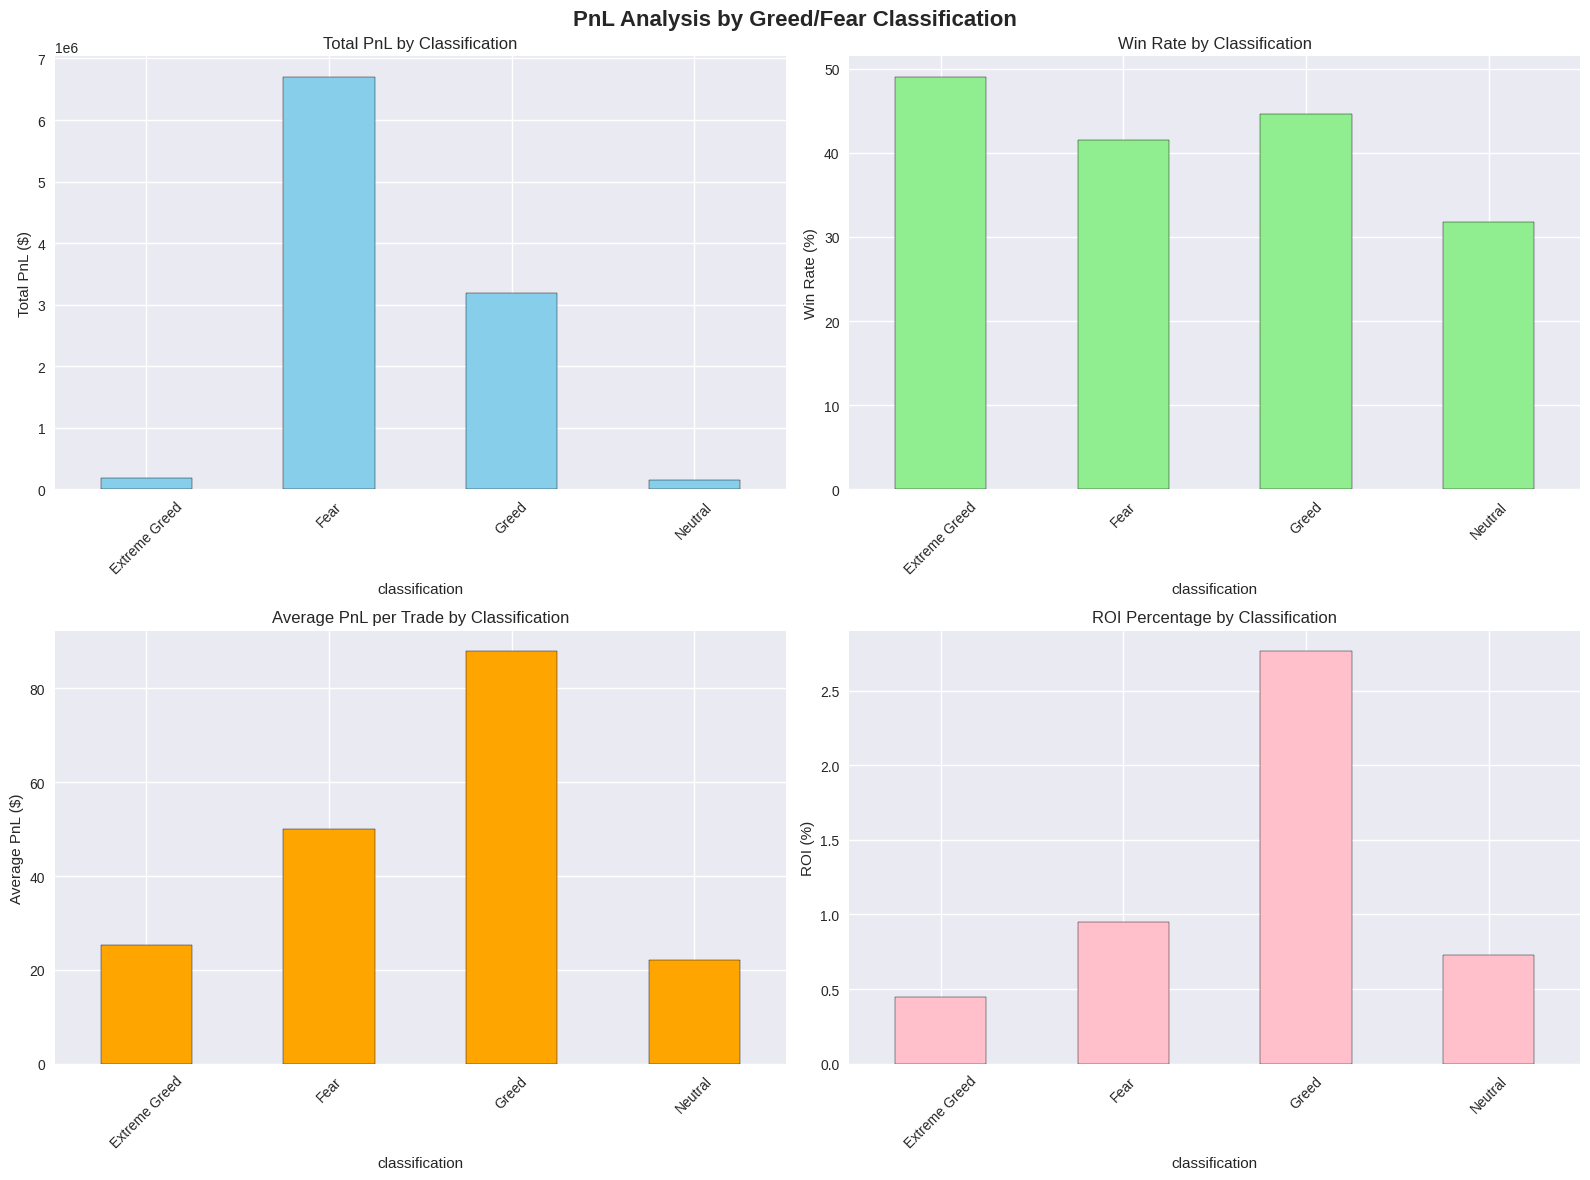


🎯 KEY INSIGHTS - Q1:
• Best Total PnL: Fear ($6,699,925.19)
• Best ROI: Greed (2.76%)
• Highest Win Rate: Extreme Greed (49.01%)

Q2: BUY/SELL BEHAVIOR ANALYSIS

Buy Trades: 88,378 transactions
Sell Trades: 95,885 transactions

BUY TRADES ANALYSIS:
               Execution Price                                    Size USD  \
                          mean         std     min       max           sum   
classification                                                               
Extreme Greed        9769.0282  17262.0528  0.0009   70669.0  1.957830e+07   
Fear                12494.3867  31059.4187  0.0023  108261.0  3.537757e+08   
Greed                6966.7113  23411.7324  0.0006  105820.0  5.614314e+07   
Neutral              2788.3882  10925.7634  0.0002   71764.0  1.090471e+07   

                          Start Position   Size Tokens  
                     mean           mean           sum  
classification                                          
Extreme Greed   5807.8611    -52

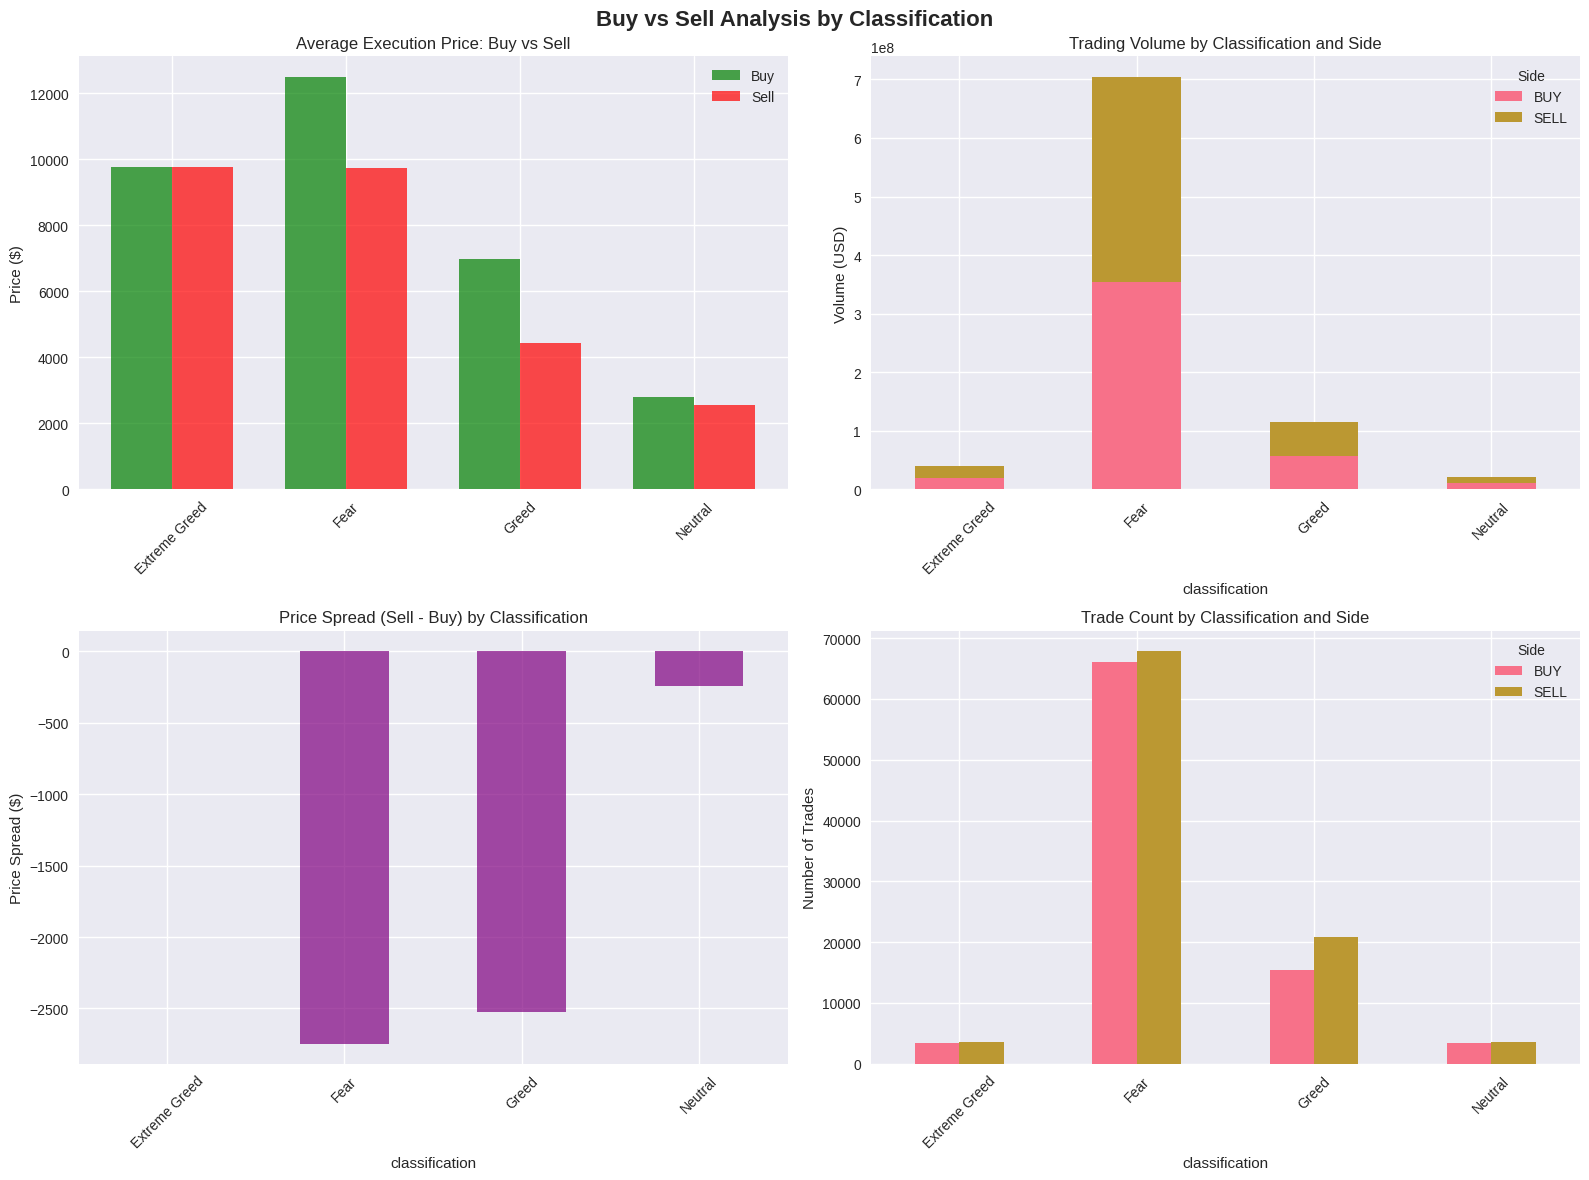


🎯 KEY INSIGHTS - Q2:
• Best classification for BUYING: Neutral (Avg: $2788.3882)
• Best classification for SELLING: Extreme Greed (Avg: $9774.5906)
• Largest price spread: Extreme Greed ($5.5624)

Q3: ORDER TYPE (CROSSED) PROFITABILITY ANALYSIS

Order Type Analysis (True=Market Order, False=Limit Order):
                           Total_PnL   Avg_PnL  Trade_Count        Volume  \
Crossed classification                                                      
False   Extreme Greed   1.551186e+05   49.5270         3132  1.517639e+07   
        Fear            3.428101e+06   64.1270        53458  2.510364e+08   
        Greed           1.907902e+06  127.4739        14967  3.729190e+07   
        Neutral         9.566560e+04   66.6659         1435  1.434213e+06   
True    Extreme Greed   2.184684e+04    5.7041         3830  2.423038e+07   
        Fear            3.271824e+06   40.6878        80413  4.531221e+08   
        Greed           1.281715e+06   60.1123        21322  7.821177e+07   


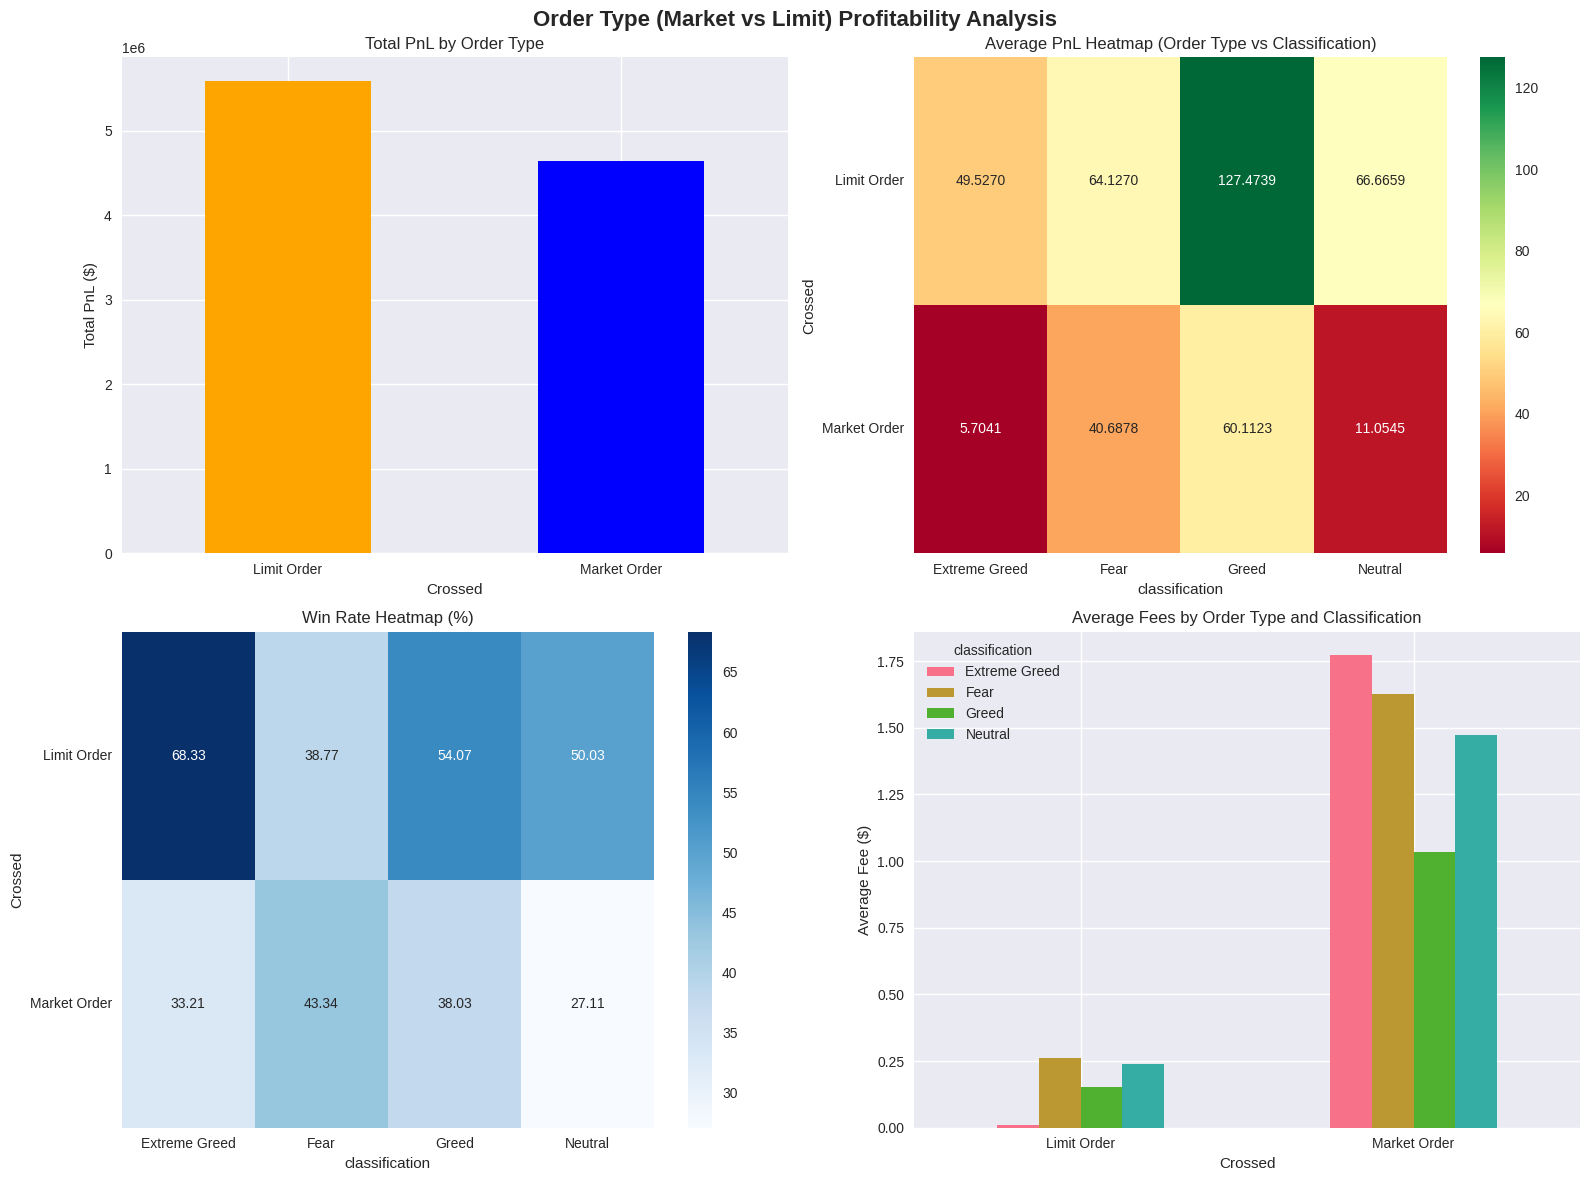


🎯 KEY INSIGHTS - Q3:
• Market Orders Total PnL: $4,638,462.35
• Limit Orders Total PnL: $5,586,787.25
• Better Order Type: Limit

Q4: GREED/FEAR INDEX VALUE ANALYSIS

Analysis by Greed/Fear Index Value:
          Total_PnL  Avg_PnL  Trade_Count        Volume   Avg_Price  Win_Rate
value                                                                        
44.0   6.699925e+06  50.0476       133871  7.041585e+08  11102.0580     41.51
50.0   1.587424e+05  22.2297         7141  2.184323e+07   2663.1323     31.72
59.0   0.000000e+00   0.0000            3  4.770000e+02   1898.1333      0.00
69.0   1.555034e+02   0.1488         1045  1.155543e+07  10454.8710     27.46
74.0   3.189461e+06  90.5043        35241  1.039478e+08   5367.5033     45.16
84.0   1.769655e+05  25.4188         6962  3.940677e+07   9771.8973     49.01

Correlation Matrix:
                  value  Closed PnL  Execution Price  Size USD
value            1.0000      0.0111          -0.0708   -0.0241
Closed PnL       0.0111  

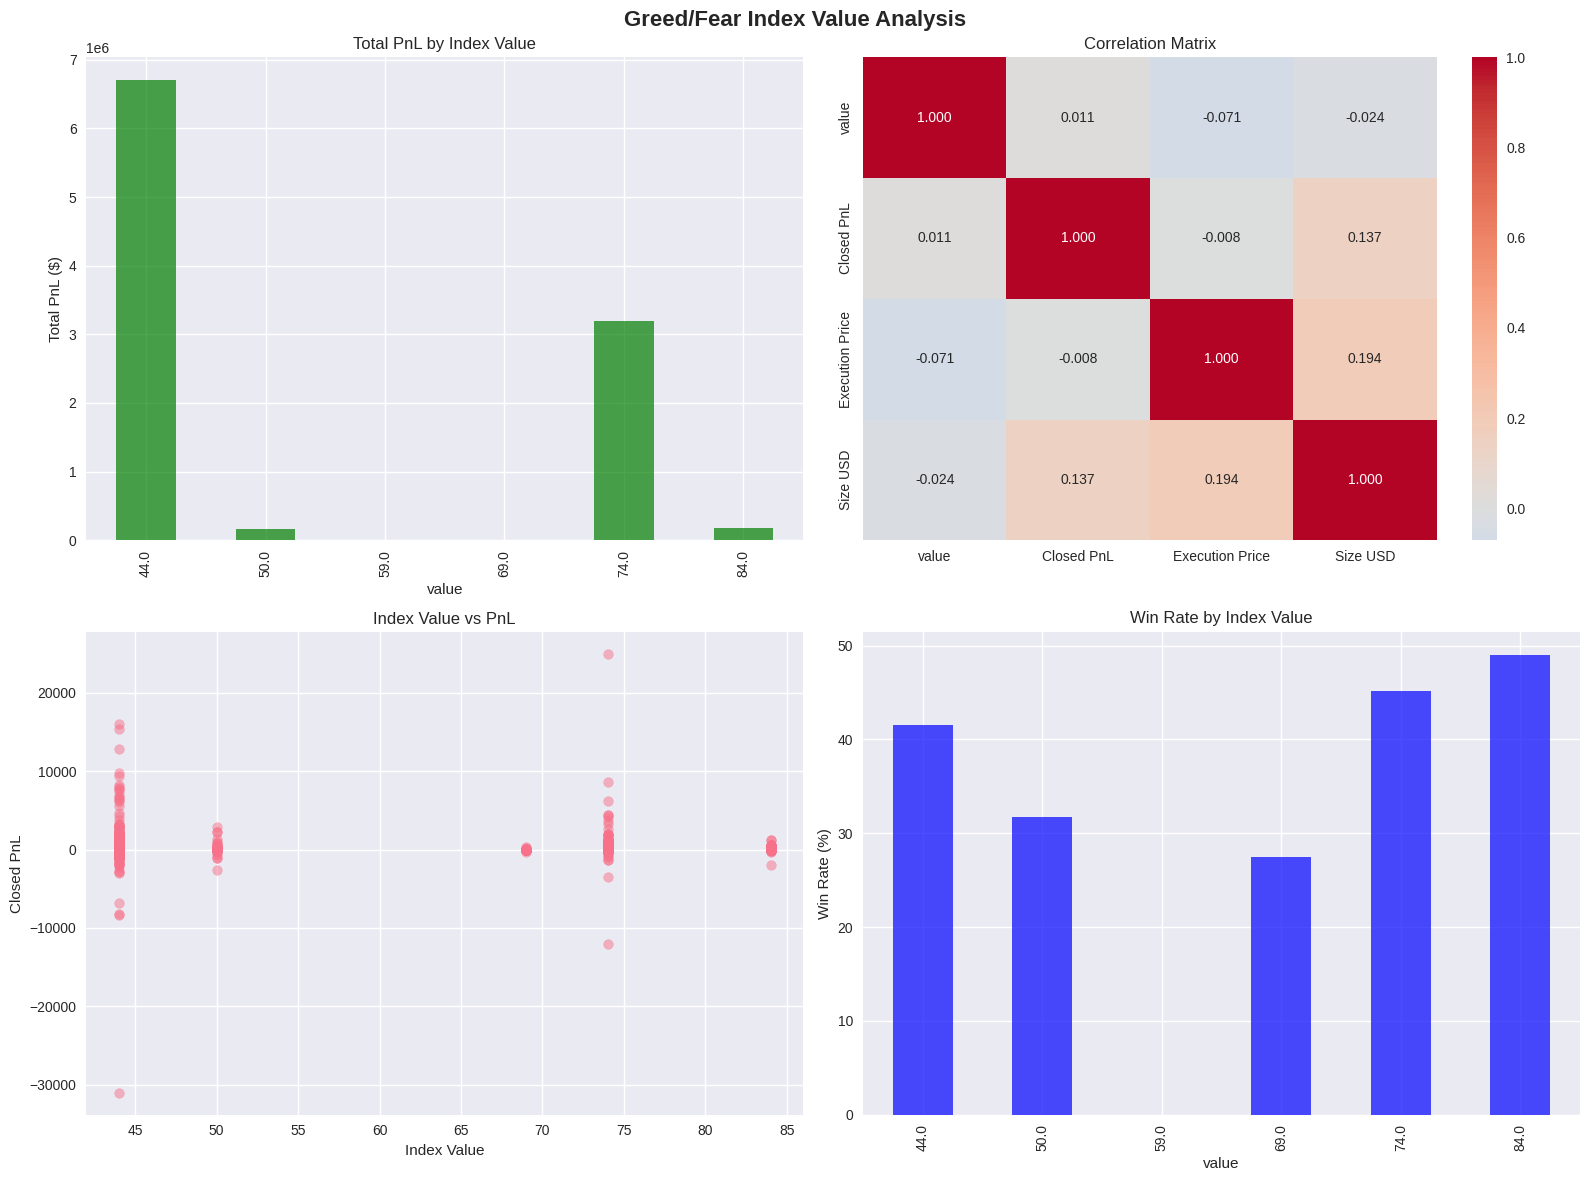


🎯 KEY INSIGHTS - Q4:
• Most profitable index value: 44.0 (PnL: $6,699,925.19)
• Highest win rate value: 84.0 (49.01%)
• Value-PnL correlation: 0.0111

Q5: TRADING DIRECTION ANALYSIS

Direction Analysis by Classification:
                                        Total_PnL    Avg_PnL  Trade_Count  \
Direction            classification                                         
Auto-Deleveraging    Neutral         5.747846e+04  7184.8070            8   
Buy                  Extreme Greed   0.000000e+00     0.0000           88   
                     Fear            0.000000e+00     0.0000         7977   
                     Greed           0.000000e+00     0.0000         5806   
                     Neutral         0.000000e+00     0.0000          786   
Close Long           Extreme Greed   8.990869e+04    37.6344         2389   
                     Fear            2.639417e+06    72.2040        36555   
                     Greed           3.350784e+05    65.6373         5105   
        

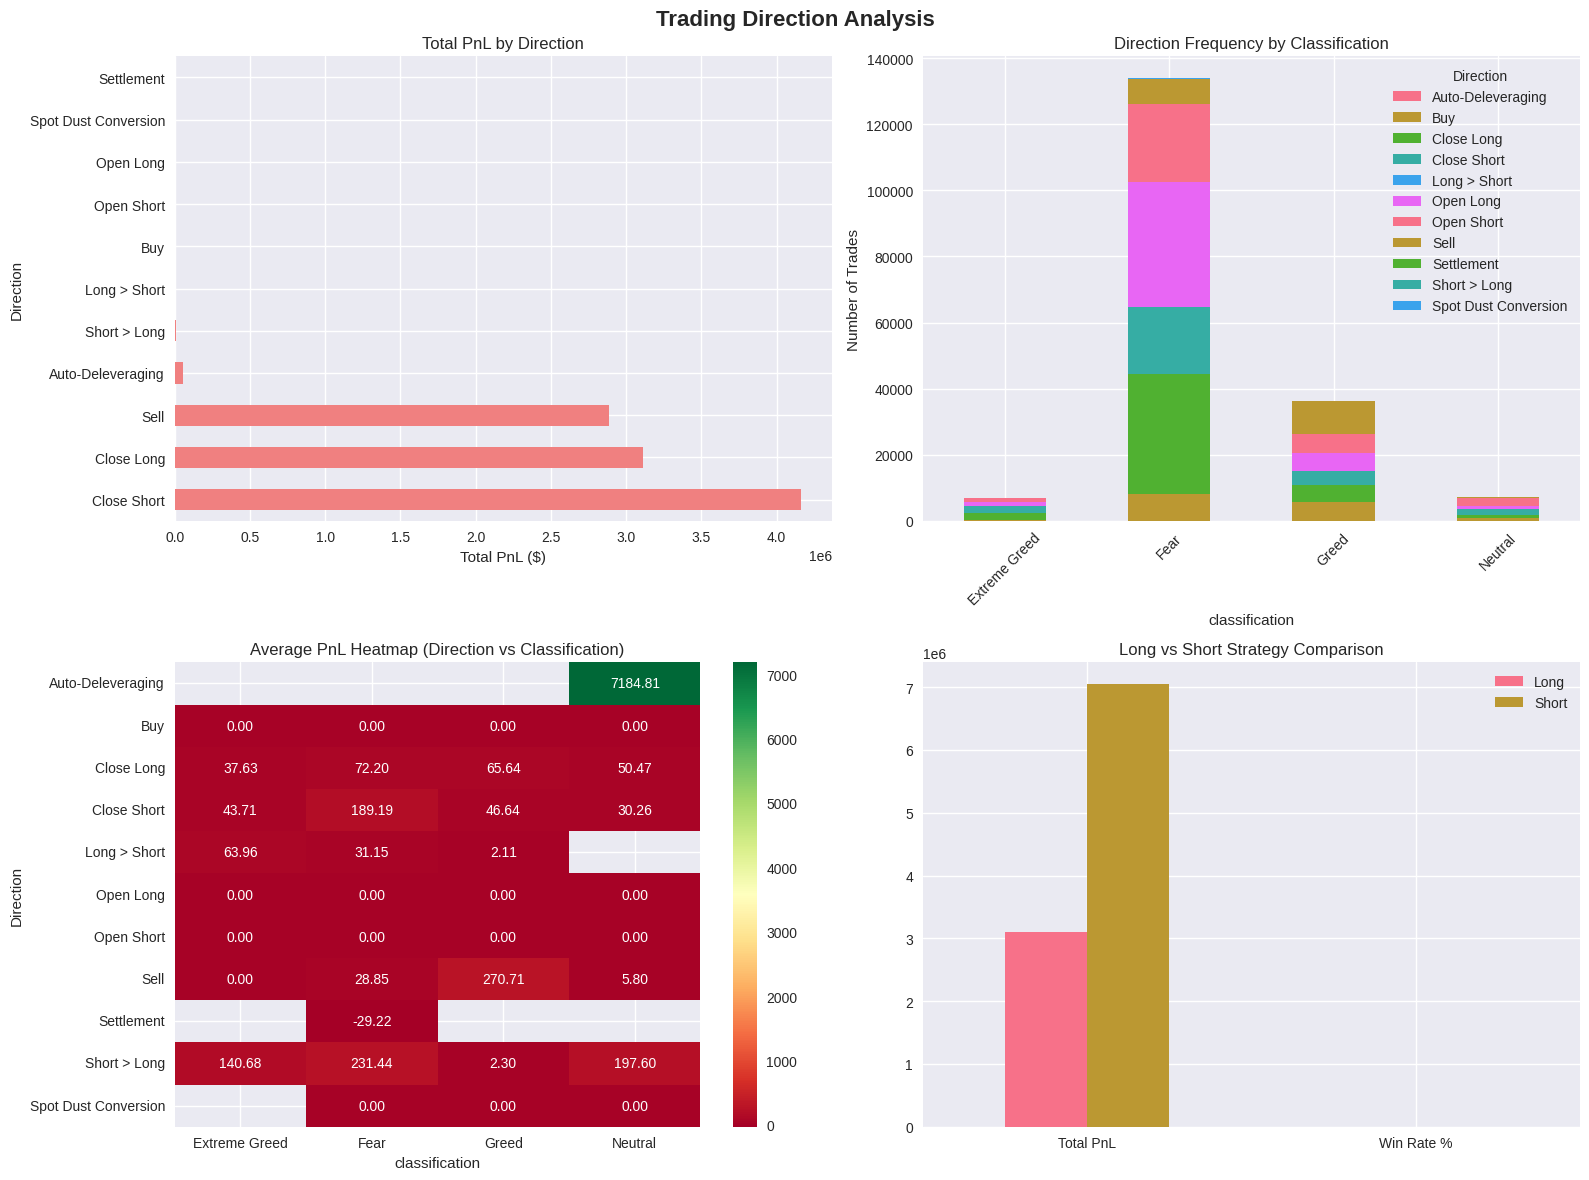


🎯 KEY INSIGHTS - Q5:
• Most profitable direction: Close Short ($4,159,132.52)
• Better overall strategy: Short

Q6: EXECUTION PRICE IMPACT BY CLASSIFICATION

Execution Price Statistics by Classification:
                      mean         std     min       max   median
classification                                                   
Extreme Greed    9771.8973  17267.9111  0.0009   70669.0  87.5000
Fear            11102.0580  29350.0686  0.0001  109004.0  17.1460
Greed            5513.7154  20927.2149  0.0000  107320.0  24.0240
Neutral          2663.1323  10895.9137  0.0000   71764.0   4.7705

Price Volatility (Coefficient of Variation):
classification
Neutral          4.0914
Greed            3.7955
Fear             2.6437
Extreme Greed    1.7671
Name: CV, dtype: float64


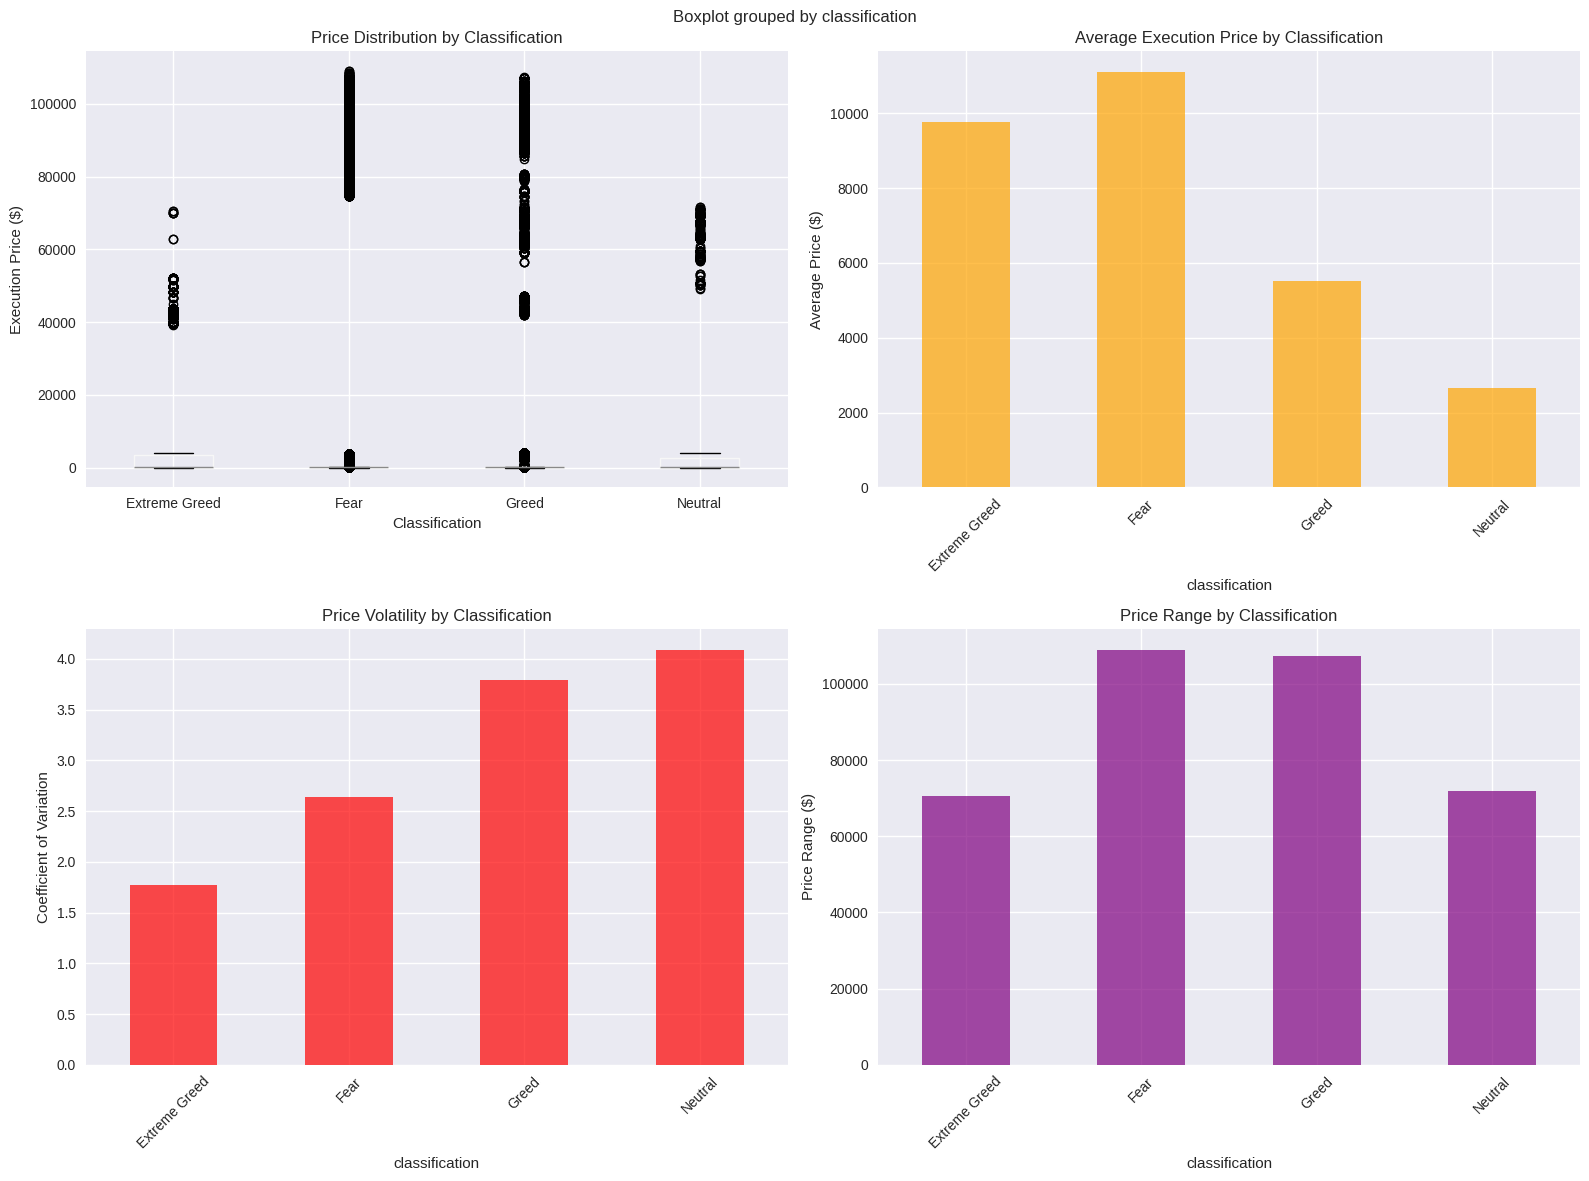


🎯 KEY INSIGHTS - Q6:
• Highest average execution price: Fear ($11102.0580)
• Most volatile classification: Neutral (CV: 4.0914)

🚀 COMPREHENSIVE TRADING STRATEGY RECOMMENDATIONS

📊 STRATEGY PERFORMANCE MATRIX:
                  total_pnl  win_rate  avg_pnl     roi  trade_count  \
Greed          3.189617e+06   44.6471  87.8949  2.7615      36289.0   
Fear           6.699925e+06   41.5146  50.0476  0.9515     133871.0   
Extreme Greed  1.769655e+05   49.0089  25.4188  0.4491       6962.0   
Neutral        1.587424e+05   31.7182  22.2297  0.7267       7141.0   

                avg_price  price_volatility  
Greed           5513.7154            3.7955  
Fear           11102.0580            2.6437  
Extreme Greed   9771.8973            1.7671  
Neutral         2663.1323            4.0914  

🏆 CLASSIFICATION RANKINGS:
1. Best Total PnL: Fear
2. Best Win Rate: Extreme Greed
3. Best ROI: Greed
4. Most Active: Fear

💡 STRATEGIC RECOMMENDATIONS:

🟢 BUYING STRATEGY:
• Best time to BUY: During 'N

(                  total_pnl   win_rate    avg_pnl       roi  trade_count  \
 Greed          3.189617e+06  44.647138  87.894859  2.761485      36289.0   
 Fear           6.699925e+06  41.514592  50.047622  0.951480     133871.0   
 Extreme Greed  1.769655e+05  49.008905  25.418772  0.449074       6962.0   
 Neutral        1.587424e+05  31.718247  22.229713  0.726735       7141.0   
 
                   avg_price  price_volatility  
 Greed           5513.715386          3.795483  
 Fear           11102.057978          2.643660  
 Extreme Greed   9771.897315          1.767099  
 Neutral         2663.132338          4.091390  ,
                    Total_PnL  Avg_PnL    PnL_Std  Trade_Count  Total_Volume  \
 classification                                                                
 Extreme Greed   1.769655e+05  25.4188   306.1669         6962  3.940677e+07   
 Fear            6.699925e+06  50.0476   909.1218       133871  7.041585e+08   
 Greed           3.189617e+06  87.8949  1148.34

In [25]:
comprehensive_bitcoin_eda(merged_df)

# Trading Simulation

In [27]:
def simulate_strategy(merged_df, selected_classifications, selected_sides):
    # Step 1: Filter by selected sentiment and side
    filtered_df = merged_df[
        (merged_df['classification'].isin(selected_classifications)) &
        (merged_df['Side'].isin(selected_sides))
    ]

    # Step 2: Identify buys during 'Neutral' and sells during 'Greed' or 'Extreme Greed'
    neutral_buys = filtered_df[
        (filtered_df['classification'] == 'Neutral') & (filtered_df['Side'] == 'BUY')
    ]

    greed_sells = filtered_df[
        (filtered_df['classification'].isin(['Greed', 'Extreme Greed'])) &
        (filtered_df['Side'] == 'SELL')
    ]

    # Step 3: Calculate and display results
    if len(neutral_buys) > 0 and len(greed_sells) > 0:
        avg_buy_price = neutral_buys['Execution Price'].mean()
        avg_sell_price = greed_sells['Execution Price'].mean()

        potential_profit = avg_sell_price - avg_buy_price
        roi_potential = (potential_profit / avg_buy_price) * 100

        print("📊 Strategy Simulation Results")
        print(f"→ Average Buy Price (Neutral): ${avg_buy_price:.4f}")
        print(f"→ Average Sell Price (Greed): ${avg_sell_price:.4f}")
        print(f"→ Potential Profit per Token: ${potential_profit:.4f}")
        print(f"→ Potential ROI: {roi_potential:.2f}%")
    else:
        print("⚠️ Not enough trades in selected filters to simulate the strategy.")

# Example call:
simulate_strategy(
    merged_df,
    selected_classifications=['Neutral', 'Greed', 'Extreme Greed','Fear'],
    selected_sides=['BUY', 'SELL']
)


📊 Strategy Simulation Results
→ Average Buy Price (Neutral): $2788.3882
→ Average Sell Price (Greed): $5223.1947
→ Potential Profit per Token: $2434.8065
→ Potential ROI: 87.32%
